In [3]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:
def rho_red_light(nx, rho_max, rho_in):
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4)] = rho_in
    return rho

In [5]:
#BAsic initial condition parameters
#defining grid size, time steps, CFL condition

nx = 81
nt = 30
dx = 4.0/(nx-1)

rho_in = 5.
rho_max = 10.

u_max = 1.

x = numpy.linspace(0,4,nx)

rho = rho_red_light(nx, rho_max, rho_in)

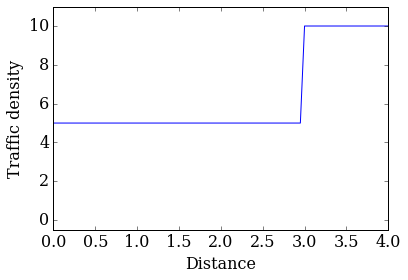

In [6]:
pyplot.plot(x, rho)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [7]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [8]:
from matplotlib import animation
from IPython.display import HTML

In [9]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

In [10]:
def laxfriedrichs(rho,nt,dt,dx,rho_max,u_max):
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[:,:] = rho.copy()  
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = .5*(rho[2:]+rho[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0] # boundary condition at x=0
        rho_n[t,-1] = rho[-1] # boundary condition at x=4
        rho = rho_n[t].copy()
        
    return rho_n

    

In [11]:
sigma = 1.0
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)      
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)

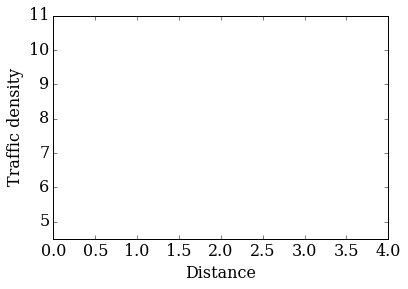

In [12]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [13]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())